Opinion Ai is just Opinion Mining .Technique used in NLP(Natural Language Processing) to determine the emotional undertone of a document.
Types->
1.Fine Grained Analysis
2.Intent Based Analysis
3.Emotion Detection
4.Aspect Based Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# just the advanced version of matplotlib
plt.style.use('ggplot')
import nltk


In [4]:
# Let's Read Our Data
df=pd.read_csv('./amazon.csv')


In [12]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [13]:
column_to_delete=['score_pos_neg_diff','score_average_rating','wilson_lower_bound']
df=df.drop(columns=column_to_delete)

In [14]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0


In [15]:
df.to_csv('./amazon.csv', index=False)

In [7]:
df.head()

,Id,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0


In [6]:
df = df.rename(columns={'Unnamed: 0': 'Id'})

In [17]:
df['reviewText'].values[0]
#Opinion Analysis will be done on this row

'No issues.'

In [18]:
print(df.shape)

(4915, 9)


EDA(Exploratory Data Analysis)

In [19]:
df['overall'].value_counts().sort_index()
#this is we are sorting and counting the number of times the cutomer gave us the score from 1 to 5

1     244
2      80
3     142
4     527
5    3922
Name: overall, dtype: int64

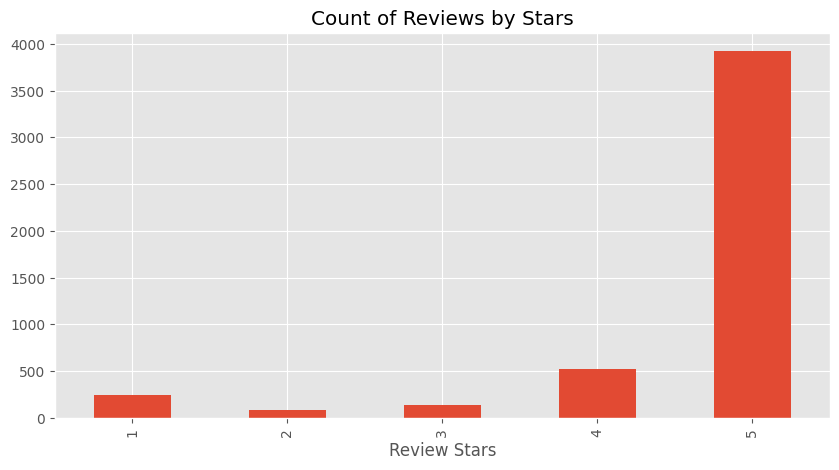

In [20]:
ax=df['overall'].value_counts().sort_index() \
    .plot(kind='bar',
            title='Count of Reviews by Stars',
            figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()
# \ it is a line continuation character in python
# the difference between xlabel and set_xlabel is that xlabel is used to define x label while plotting the graph and set_xlabel is used to specify xaxis for a specific axes object


Basic NLTK(Natural Language Toolkit)

In [21]:
example = df['reviewText'][50]
print(example)


A memory card either works or it doesn't. This was always going to be a one star or five star review - no middle ground.The adapter is a nice bonus too, though I don't think I have anything to use it with.


In [28]:
token=nltk.word_tokenize(example)
token[:10]
# spilts each word using tokanization
#So the 1st thing nltk does is Tokenization


['A', 'memory', 'card', 'either', 'works', 'or', 'it', 'does', "n't", '.']

In [34]:
tagged=nltk.pos_tag(token)
tagged[:10]
#each tokenized letter is given it's own part of speech such as NN means that it is a noun

[('A', 'DT'),
 ('memory', 'NN'),
 ('card', 'NN'),
 ('either', 'CC'),
 ('works', 'VBZ'),
 ('or', 'CC'),
 ('it', 'PRP'),
 ('does', 'VBZ'),
 ("n't", 'RB'),
 ('.', '.')]

In [40]:
entity=nltk.chunk.ne_chunk(tagged)
entity.pprint()
#named entity extraction from the text here such as location and organization that it becomes easier to identify

(S
  A/DT
  memory/NN
  card/NN
  either/CC
  works/VBZ
  or/CC
  it/PRP
  does/VBZ
  n't/RB
  ./.
  This/DT
  was/VBD
  always/RB
  going/VBG
  to/TO
  be/VB
  a/DT
  one/CD
  star/NN
  or/CC
  five/CD
  star/NN
  review/NN
  -/:
  no/DT
  middle/JJ
  ground.The/NN
  adapter/NN
  is/VBZ
  a/DT
  nice/JJ
  bonus/NN
  too/RB
  ,/,
  though/IN
  I/PRP
  do/VBP
  n't/RB
  think/VB
  I/PRP
  have/VBP
  anything/NN
  to/TO
  use/VB
  it/PRP
  with/IN
  ./.)


VADER(Valence Aware Dictionary and Sentiment Analysis)
It has bag of values such as Positive, Negative and Neutral and it identifies the text according to that so it wil tell how positive how much negative how neutral that statement is actually
But the drwback is it doesn't account  of relationship between words which is important in human speech

In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer # pretrained sentiment analysis class
from tqdm.notebook import tqdm #progress bar tracker

sia=SentimentIntensityAnalyzer()

In [45]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [46]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [47]:
sia.polarity_scores(example)

{'neg': 0.053, 'neu': 0.795, 'pos': 0.152, 'compound': 0.6249}

In [11]:
#Run the Polarity Score on the Entire DataSet
#we form a dictionary to store the polarity scores of each id
temp= {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text=str(row['reviewText'])
    myid=row['Id']
    temp[myid]=sia.polarity_scores(text)

  0%|          | 0/4915 [00:00<?, ?it/s]

In [12]:
temp

{0: {'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.296},
 1: {'neg': 0.075, 'neu': 0.925, 'pos': 0.0, 'compound': -0.296},
 2: {'neg': 0.077, 'neu': 0.923, 'pos': 0.0, 'compound': -0.3089},
 3: {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.7081},
 4: {'neg': 0.038, 'neu': 0.835, 'pos': 0.127, 'compound': 0.7087},
 5: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 6: {'neg': 0.063, 'neu': 0.745, 'pos': 0.192, 'compound': 0.8992},
 7: {'neg': 0.044, 'neu': 0.833, 'pos': 0.123, 'compound': 0.7768},
 8: {'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.296},
 9: {'neg': 0.0, 'neu': 0.627, 'pos': 0.373, 'compound': 0.9167},
 10: {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.9258},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 13: {'neg': 0.058, 'neu': 0.716, 'pos': 0.225, 'compound': 0.7425},
 14: {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.4295},
 15: {'neg': 0.057,

In [15]:
pd.DataFrame(temp)

,0,1,2,3,4,5,6,7,8,9,...,4905,4906,4907,4908,4909,4910,4911,4912,4913,4914
neg,0.688,0.075,0.0770,0.0000,0.0380,0.0,0.0630,0.0440,0.091,0.0000,...,0.0670,0.1010,0.1980,0.0000,0.0000,0.0910,0.0000,0.0000,0.0000,0.0490
neu,0.312,0.925,0.9230,0.9090,0.8350,1.0,0.7450,0.8330,0.909,0.6270,...,0.6980,0.7830,0.7290,0.7800,0.8310,0.8170,0.9390,0.8280,0.8020,0.6930
pos,0.000,0.000,0.0000,0.0910,0.1270,0.0,0.1920,0.1230,0.000,0.3730,...,0.2360,0.1150,0.0730,0.2200,0.1690,0.0920,0.0610,0.1720,0.1980,0.2580
compound,-0.296,-0.296,-0.3089,0.7081,0.7087,0.0,0.8992,0.7768,-0.296,0.9167,...,0.7629,0.0772,-0.4767,0.9022,0.6249,0.0018,0.1761,0.8588,0.4939,0.8923


In [25]:
vaders=pd.DataFrame(temp).T


In [26]:
vaders=vaders.reset_index().rename(columns={'index':'Id'})
#we are first resetting the index in the vaders table above and then changing index to Id so that i ca merge this review table to the original table
vaders=vaders.merge(df, how='left', on='Id')

In [27]:
vaders

,Id,neg,neu,pos,compound,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote
0,0,0.688,0.312,0.000,-0.2960,NaN,4,No issues.,23-07-2014,138,0,0,0
1,1,0.075,0.925,0.000,-0.2960,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0
2,2,0.077,0.923,0.000,-0.3089,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0
3,3,0.000,0.909,0.091,0.7081,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0
4,4,0.038,0.835,0.127,0.7087,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,0.091,0.817,0.092,0.0018,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,23-07-2013,503,0,0,0
4911,4911,0.000,0.939,0.061,0.1761,Zo,5,Used this for extending the capabilities of my...,22-08-2013,473,0,0,0
4912,4912,0.000,0.828,0.172,0.8588,Z S Liske,5,Great card that is very fast and reliable. It ...,31-03-2014,252,0,0,0
4913,4913,0.000,0.802,0.198,0.4939,Z Taylor,5,Good amount of space for the stuff I want to d...,16-09-2013,448,0,0,0


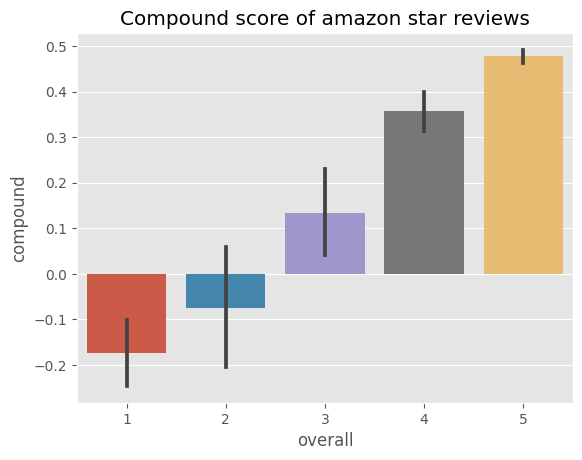

In [31]:
#Now we have sentiment score and metadata
#Now let's make an assumption that 5 star review will have more of a positive review whereas 1 star review will have a negative review
ax=sns.barplot(data=vaders, x='overall', y='compound')
ax.set_title('Compound score of amazon star reviews')
plt.show()


<AxesSubplot:xlabel='overall', ylabel='pos'>

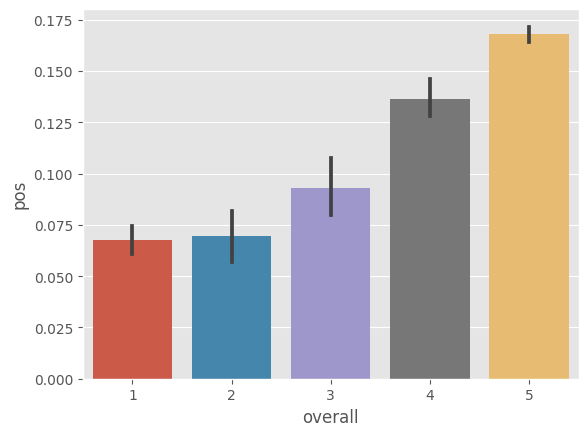

In [33]:
#Just what we assumed for the overall score more the compound
#now let's do that plot with negative, positive and neutral reviews

sns.barplot(data=vaders, x='overall', y='pos')

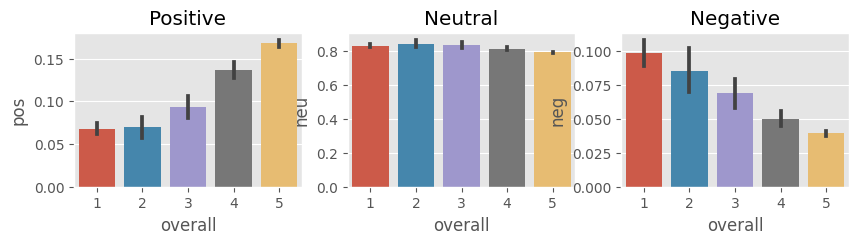

In [36]:
fig, axs=plt.subplots(1,3, figsize=(10,2))
# we plot on horizontal frame that is 1 row and 3 columns which is 3 subplots on horizontal frame and 10 inches as width and 2 as height
#fig and axs both are returned that is fig is taken as the entire figure in here and whereas axs is an array containing all the 3 subplots as axs[0],axs[1],axs[2]
#so when both of them are returned axs return indivisual plotting and fig returns the entire plotting
sns.barplot(data=vaders, x='overall', y='pos' ,ax=axs[0])
sns.barplot(data=vaders, x='overall', y='neu' ,ax=axs[1])
sns.barplot(data=vaders, x='overall', y='neg' ,ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()
